In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os as os

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

---
### [Equilibrium Technology Diffusion, Trade, and Growth](https://christophertonetti.com/files/papers/PerlaTonettiWaugh_DiffusionTradeAndGrowth.pdf) by Perla, Tonetti, and Waugh (AER 2020)

## Section 7.4. The Welfare Effects of a Reduction in Trade Costs

This is the main driver file that computes transition dynamics and generates figures and numbers reported in the paper. 

Table of Contents
- [Compute Transition Dynamics](#trans)

- [Figures](#figs)
    - [Figure 1: Volume of Trade](#fig1)
    - [Figure 2: Variety](#fig2)
    - [Figure 3: Realocation Effects](#fig3)
    - [Figure 4: Log Consumption](#fig4)
    - [Figure 5: Productivity Growth](#fig5)

---

## <a name="trans"></a> Compute Transition Dynamics

In [10]:
julia_path = '''C:\\Users\\mwaugh\\AppData\\Local\\Programs\\Julia\\Julia-1.4.0\\bin\\julia.exe'''

###Set correc Julia path for your configuration

In [11]:
!jupyter nbconvert --to script TransitionDynamics.ipynb

julia_command = '''TransitionDynamics.jl'''

!{julia_path} {julia_command}

[NbConvertApp] Converting notebook TransitionDynamics.ipynb to script
[NbConvertApp] Writing 3460 bytes to TransitionDynamics.jl



-------------------------------------------------------------------------
SS to SS Baseline vs. 10% Lower Trade Costs


Change in Growth, Steady State to Steady State
Growth in Baseline: 0.79
Growth in New SS: 1.03


Imports/GDP, Steady State to Steady State
Imports/GDP in Baseline: 10.6
Imports/GDP in New SS: 14.4


Consumption Equivalent Welfare Gain, Steady State to Steady State
CE gains: 11.2


-------------------------------------------------------------------------

Computing Transition Dynamics

cachename: 1128371551232770518

solving without cache
486.873108 seconds (1.80 G allocations: 694.058 GiB, 14.00% gc time)

-------------------------------------------------------------------------

Consumption Equivalent Welfare Gain, Inclusive of Transition Path
CE gains: 10.8



Load the transition path computed in [TransitionDynamics.ipynb](https://github.com/jlperla/PerlaTonettiWaugh.jl/blob/master/TransitionDynamics.ipynb)

In [12]:
output_location = "data/"
hash_value = "11368798858269829579"
output_location = output_location + hash_value + ".csv"
df = pd.read_csv(output_location) # front-loaded with values from stationary equilibrium computation
fig_path = "figures/"

**Note:** The dataframe is front-loaded with the time-0 stationary solution. The transition dynamics start with change at ``loc[5]``

## <a name="figs"></a> Figures 1-5 in PTW

--- 
### <a name="fig1"></a>Figure 1: Volume of Trade

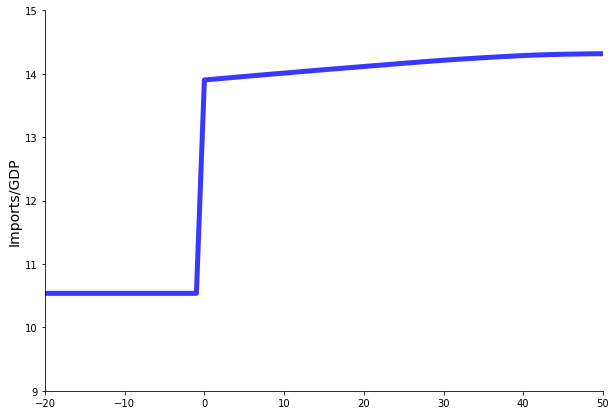

In [13]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, 100*(1-df.λ_ii), color = "blue", lw = 5,
        label = "Imports/GDP", ls = "-", alpha = 0.78)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Imports/GDP", fontsize = 14) 
ax.set_xlim(-20,50)
ax.set_ylim(9,15)

plt.savefig(fig_path + "trade.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [14]:
print("Percentage Point Change in Imports/GDP Immediately After Change in d")
print(round(100*((1-df.λ_ii).iloc[5]-(1-df.λ_ii).iloc[0]),4))
print("")
print("Percentage Point Change in Imports/GDP at New SS")
print(round(100*((1-df.λ_ii).iloc[-1]-(1-df.λ_ii).iloc[0]),4))

Percentage Point Change in Imports/GDP Immediately After Change in d
3.3645

Percentage Point Change in Imports/GDP at New SS
3.7817


---

### <a name="fig2"></a>Figrue 2: Domestic Variety 

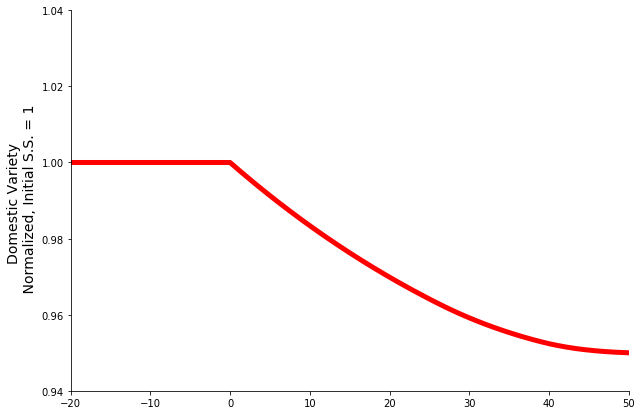

In [15]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, df.Ω/df.Ω.iloc[0], color = "red", lw = 5,
        label = "", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Domestic Variety \n Normalized, Initial S.S. = 1", fontsize = 14) 

ax.set_ylim(0.94,1.04)

ax.set_xlim(-20,50)

plt.savefig(fig_path + "omega.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [16]:
print("Normalized Variety Prior to Change in d (Relative to Initial SS)")
print(round((df.Ω/df.Ω.iloc[0]).iloc[0],4))
print("")
print("Normalized Variety Immediately After Change in d (Relative to Initial SS)")
print(round((df.Ω/df.Ω.iloc[0]).iloc[6],4))
print("")
print("Normalized Variety At New SS (Relative to Initial SS)")
print(round((df.Ω/df.Ω.iloc[0]).iloc[-1],4))

Normalized Variety Prior to Change in d (Relative to Initial SS)
1.0

Normalized Variety Immediately After Change in d (Relative to Initial SS)
0.9995

Normalized Variety At New SS (Relative to Initial SS)
0.9498


---

### <a name="fig3"></a>Figure 3: Reallocation Effects

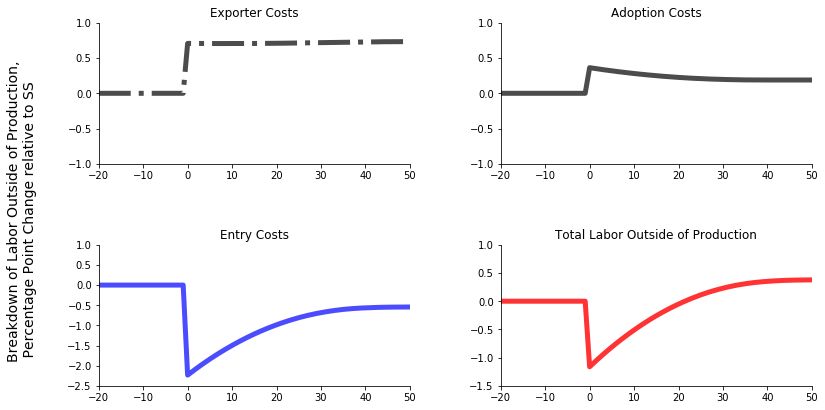

In [17]:
fig, ax = plt.subplots(2,2,figsize = (12,7))

fig.tight_layout(pad = 6)

fig.text(-0.01, 0.5, "Breakdown of Labor Outside of Production,\n Percentage Point Change relative to SS"
         , va='center', rotation='vertical',fontsize = 14)

############################################################################################################
postion = (0,0)

ax[postion].plot(df.t, 100*((df.L_tilde_x) - (df.L_tilde_x.iloc[0])), color = "black", 
           lw = 5, ls = "-.", alpha = 0.70, label = "Exporting Costs")

ax[postion].spines["top"].set_visible(False)
ax[postion].spines["right"].set_visible(False)

ax[postion].set_xlim(-20,50)
ax[postion].set_ylim(-1.0,1.0)

ax[postion].set_title("Exporter Costs")

############################################################################################################

postion = (0,1)

ax[postion].plot(df.t, 100*((df.L_tilde_a) - (df.L_tilde_a.iloc[0])), color = "black",
           lw = 5, ls = "-", alpha = 0.70, label = "Adoption Costs")

ax[postion].spines["top"].set_visible(False)
ax[postion].spines["right"].set_visible(False)

ax[postion].set_xlim(-20,50)
ax[postion].set_ylim(-1.0,1.0)
ax[postion].set_title("Adoption Costs")

############################################################################################################

postion = (1,0)

ax[postion].plot(df.t, 100*(df.L_tilde_E - df.L_tilde_E.iloc[0]) , color = "blue", 
           lw = 5, ls = "-", alpha = 0.70, label = "Entry Costs")

ax[postion].spines["top"].set_visible(False)
ax[postion].spines["right"].set_visible(False)

ax[postion].set_xlim(-20,50)
ax[postion].set_ylim(-2.5,1.0)

ax[postion].set_title("Entry Costs")

############################################################################################################

postion = (1,1)

ax[postion].plot(df.t, 100*(df.L_tilde - df.L_tilde.iloc[0])
           , color = "red", lw = 5, ls = "-", alpha = 0.80, label = "Total Fixed Costs")

ax[postion].spines["top"].set_visible(False)
ax[postion].spines["right"].set_visible(False)

ax[postion].set_xlim(-20,50)
ax[postion].set_ylim(-1.50,1.0)


ax[postion].set_title("Total Labor Outside of Production")

############################################################################################################
plt.savefig(fig_path + "fixed_costs.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

#### Exporter Costs

In [18]:
cost_measure = 100*((df.L_tilde_x) - (df.L_tilde_x.iloc[0]))

print("Exporter Costs Prior to Change in d (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[0],4))
print("")
print("Exporter Costs Immediately After Change in d  (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[5],4))
print("")
print("Exporter Costs At New SS  (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[-1],4))

Exporter Costs Prior to Change in d (Percentage Point Change relative to SS)
0.0

Exporter Costs Immediately After Change in d  (Percentage Point Change relative to SS)
0.7077

Exporter Costs at New SS  (Percentage Point Change relative to SS)
0.7338


#### Adoption Costs

In [19]:
cost_measure = 100*((df.L_tilde_a) - (df.L_tilde_a.iloc[0]))

print("Adoption Costs Prior to Change in d (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[0],4))
print("")
print("Adoption Costs Immediately After Change in d  (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[5],4))
print("")
print("Adoption Costs At New SS  (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[-1],4))

Adoption Costs Prior to Change in d (Percentage Point Change relative to SS)
0.0

Adoption Costs Immediately After Change in d  (Percentage Point Change relative to SS)
0.3635

Adoption Costs at New SS  (Percentage Point Change relative to SS)
0.1888


#### Entry Costs

In [20]:
cost_measure = 100*(df.L_tilde_E - df.L_tilde_E.iloc[0])

print("Entry Costs Prior to Change in d (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[0],4))
print("")
print("Entry Costs Immediately After Change in d  (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[5],4))
print("")
print("Entry Costs At New SS  (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[-1],4))

Entry Costs Prior to Change in d (Percentage Point Change relative to SS)
0.0

Entry Costs Immediately After Change in d  (Percentage Point Change relative to SS)
-2.2344

Entry Costs At New SS  (Percentage Point Change relative to SS)
-0.5428


#### Total Labor Outside of Production

In [21]:
cost_measure = 100*(df.L_tilde - df.L_tilde.iloc[0])

print("Total Labor Outside of Production Prior to Change in d (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[0],4))
print("")
print("Total Labor Outside of Production Immediately After Change in d  (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[5],4))
print("")
print("Total Labor Outside of Production At New SS  (Percentage Point Change relative to SS)")
print(round(cost_measure.iloc[-1],4))

Total Labor Outside of Production Prior to Change in d (Percentage Point Change relative to SS)
0.0

Total Labor Outside of Production Immediately After Change in d  (Percentage Point Change relative to SS)
-1.1632

Total Labor Outside of Production At New SS  (Percentage Point Change relative to SS)
0.3798


---
### <a name="fig4"></a>Figure 4: Log Consumption

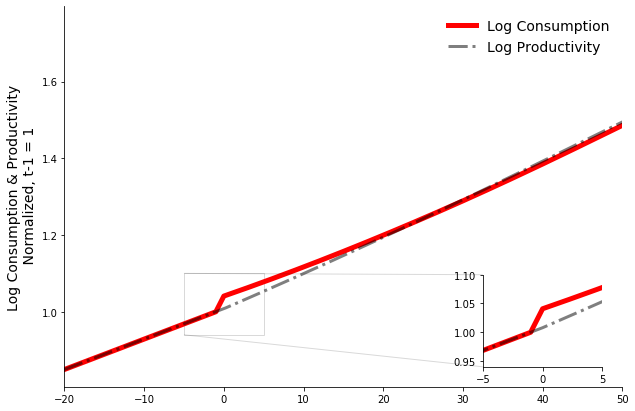

In [22]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, (np.log(df.c) + df.log_M) - (np.log(df.c) + df.log_M).iloc[4] +1, color = "red", lw = 5,
       label = "Log Consumption")

ax.plot(df.t, (df.log_M) - (df.log_M).iloc[4] + 1, color = "k", ls = "-.", alpha = 0.5, lw = 3,
       label = "Log Productivity")
        
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Log Consumption & Productivity\n Normalized, t-1 = 1", fontsize = 14) 

#ax.set_ylim(1-0.06,1+0.25)
ax.set_xlim(-20,50)

ax.legend(fontsize = 14, frameon = False)

axins = zoomed_inset_axes(ax, # The original ax
                          1.5, # zoom level
                          loc=4, # location
                          borderpad=2)  # space around it relative to figure

axins.plot(df.t, (np.log(df.c) + df.log_M) - (np.log(df.c) + df.log_M).iloc[4] +1, color = "red", lw = 5,
       label = "Log Consumption")

axins.plot(df.t, (df.log_M) - (df.log_M).iloc[4]+1, color = "k", ls = "-.", alpha = 0.5, lw = 3,
       label = "Log Productivity")
        
axins.set_xlim(-5,5)
axins.set_ylim(1-0.06,1+0.10)

mark_inset(ax, axins, loc1=3, loc2=2, alpha = 0.15)

axins.spines["top"].set_visible(False)
axins.spines["right"].set_visible(False)

plt.savefig(fig_path + "log_consumption_inset.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [23]:
print("Normalized Consumption Prior to Change in d (Relative to Initial SS)")
print(round((df.c/df.c.iloc[0]).iloc[0],4))
print("")
print("Normalized Consumption Immediately After Change in d (Relative to Initial SS)")
print(round((df.c/df.c.iloc[0]).iloc[5],4))
print("")
print("Normalized Consumption At New SS (Relative to Initial SS)")
print(round((df.c/df.c.iloc[0]).iloc[-1],4))

Normalized Consumption Prior to Change in d (Relative to Initial SS)
1.0

Normalized Consumption Immediately After Change in d (Relative to Initial SS)
1.0335

Normalized Consumption At New SS (Relative to Initial SS)
0.9912


---

### <a name="fig5"></a> Figure 5: Productivity Growth

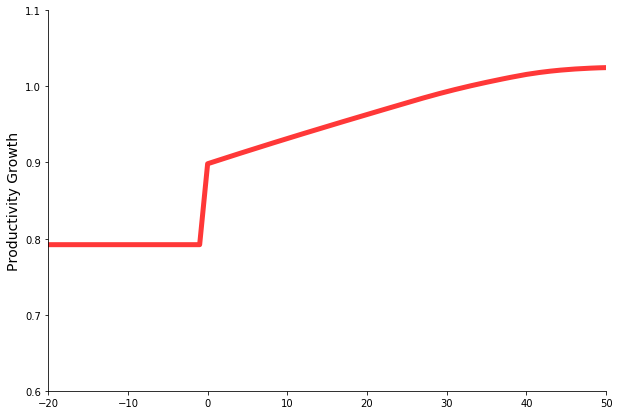

In [24]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, 100*(df.g), color = "red", lw = 5,
        label = "Growth Rate", ls = "-", alpha = 0.78)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Productivity Growth", fontsize = 14) 
ax.set_xlim(-20,50)
ax.set_ylim(0.6,1.10)

plt.savefig(fig_path + "growth.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [25]:
print("Productivity Growth at Initial SS")
print(round(df.g.iloc[0],4))
print("")
print("Productivity Growth Immediately After Change in d")
print(round(df.g.iloc[5],4))
print("")
print("Productivity Growth at New SS")
print(round(df.g.iloc[-1],4))

Productivity Growth at Initial SS
0.0079

Productivity Growth Immediately After Change in d
0.009

Productivity Growth at New SS
0.0103
